<a href="https://colab.research.google.com/github/rafaeldsouza/mestrado/blob/main/Redes%20Neurais/Redes_Neurais_custo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aluno**: Rafael de Souza Conceição

**Matéria**: Redes Neurais - Francisco de Assis Boldt

#Exercicio

Faça um Jupyter Notebook com gráficos comparando a redução do custo em duas implementações diferentes do perceptron:

com o treinamento online, isto é, o ajustes dos pesos usa o erro de 1 exemplo e cada vez;
com o treinamento em batch, quando usa-se todos os exemplos da base de dados simultaneamente para estimar o erro e ajustar os pesos.
Escreva um parágrafo explicando as diferenças e o motivo do comportamento de cada implementação.

A entrega é um link para o Jupyter Notebook  hospedado no GitHub.



In [1]:
import numpy as np



In [2]:
def geradataset(n=20):
    X = np.random.uniform(size=(n,2))
    y = np.array(X[:,0]>X[:,1], dtype=int)*2-1
    return X, y

X, y = geradataset()
X, y

(array([[0.63301318, 0.09620087],
        [0.84290336, 0.41826248],
        [0.62242627, 0.50801359],
        [0.56338269, 0.40093152],
        [0.16575532, 0.40651491],
        [0.19571534, 0.98880211],
        [0.11739178, 0.97764831],
        [0.88290677, 0.23446152],
        [0.83274186, 0.57647342],
        [0.64008834, 0.77529296],
        [0.22125739, 0.01536151],
        [0.56185157, 0.20153069],
        [0.28604267, 0.76421959],
        [0.07855349, 0.41857869],
        [0.48985016, 0.69376439],
        [0.90617724, 0.76096096],
        [0.95529721, 0.79338956],
        [0.83517662, 0.97617551],
        [0.61682411, 0.81052418],
        [0.96406775, 0.43595022]]),
 array([ 1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1,
        -1, -1,  1]))

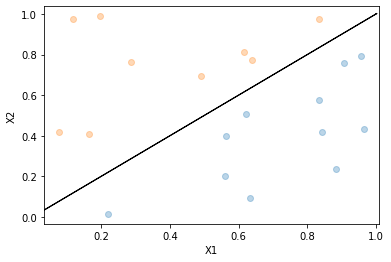

In [3]:
import matplotlib.pyplot as plt

def plotadataset(X, y):
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

plotadataset(X, y)

def plotavetor(vetor, cor="k"):
  origem = [0,0]
  plt.arrow(*origem,*vetor,color=cor)

def perpendicular(vetor):
  perp = np.array(vetor[::-1])
  perp[0]*=-1
  return perp

vetor = [1,-1]
hiperplano = perpendicular(vetor)
plotavetor(hiperplano)

In [38]:
from sklearn.base import BaseEstimator, ClassifierMixin
import random

class CustoPerceptron():
  @staticmethod
  def erro(y, ypred):
    return y-ypred

  @staticmethod
  def custo(y, ypred):
    return np.sum(1 - CustoPerceptron.erro(y, ypred)**2) 
  @staticmethod
  def gradiente(y, ypred, x):
    return np.matmul(CustoPerceptron.erro(y,ypred),x)

class Adaline():
  def __init__(self):
    self.preactivated = True

  @staticmethod
  def erro(y, ypred):
    return y-ypred

  @staticmethod
  def custo(y, ypred):
    return np.sum((1-Adaline.erro(y, ypred))**2) 
  @staticmethod
  def gradiente(y, ypred, x):
    return np.matmul(Adaline.erro(y,ypred),x)

class HingeLoss():
  @staticmethod
  def erro(y, ypred):
    return np.multiply(y,ypred)

  @staticmethod
  def custo(y, ypred):
    return np.sum(1-HingeLoss.erro(y, ypred)) 
  @staticmethod
  def gradiente(y, ypred, x):
    marginais = HingeLoss.erro(y, ypred) < 1
    return np.matmul(y[marginais],x[marginais])

class Perceptron(BaseEstimator, ClassifierMixin):
    """
    Primeira versão do Perceptron treinado pelo
    Perceptron Learning Algorithm (PLA).
    """
    def __init__(self, custo=CustoPerceptron()):
        self.w = None
        self.activation = lambda a: (a>=0)*2-1
        self.alpha = 0.1
        self.maxiter = 100
        self.custo = custo

    def fit(self, X, y):
        self.w = np.random.uniform(-1, 1, size=X.shape[1])
        for _ in range(self.maxiter):
          if hasattr(self.custo,'preactivated') and self.custo.preactivated:
            ypred = self.preactivate(X)
          else:
            ypred = self.predict(X)
              
          custo = self.custo.custo(y, ypred)
          print(custo)
          self.w = self.w + self.alpha*self.custo.gradiente(y, ypred, X)
          if custo==0:
            break

    def preactivate(self, X):
      return np.matmul(X, self.w)

    def predict(self, X):
        a = self.preactivate(X)
        ypred = self.activation(a)
        return ypred





In [39]:
X, y = geradataset()
perceptron = Perceptron()
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y==ypred)/len(y))


-20
-20
-20
-12
-20
12
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
1.0


In [40]:
perceptron = Perceptron(custo=Adaline())
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y==ypred)/len(y))

74.67136471443825
25.028631485940856
34.793373850675195
26.924339202477125
27.255043213696414
25.159917438829815
24.49357881142339
23.650533282900827
23.15744749872753
22.74424890509199
22.462687031107183
22.253124828799145
22.108037577606165
22.007087902531385
21.940388565931148
21.898289252257083
21.874308475604796
21.86324568889772
21.86131890021485
21.865659947593908
21.87416079738364
21.88526565798128
21.897846037050794
21.91109185148636
21.924433263973324
21.937479112982494
21.94997080050446
21.961747010620826
21.972717130750656
21.982841183350715
21.99211479204397
22.000557965298324
22.00820679358558
22.015107353982838
22.02131128547628
22.026872622300637
22.031845570624377
22.036282988323748
22.04023538515462
22.043750304682977
22.046871983160948
22.049641206408396
22.052095305538135
22.054268247441367
22.056190787421937
22.057890660068733
22.059392791033257
22.060719517332384
22.061890807506085
22.062924475724632
22.063836385982437
22.06464064401421
22.065349775652983
22.06597

In [41]:


perceptron = Perceptron(custo=HingeLoss())
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y==ypred)/len(y))

10
12
16
0
1.0


-40
-16
-24
-12
-16
-4
8
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
1.0


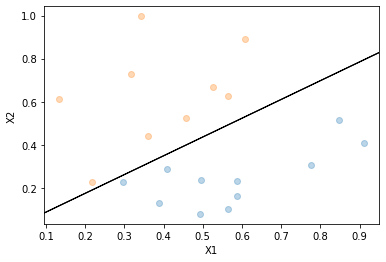

28
18
22
18
22
14
10
10
6
0
1.0


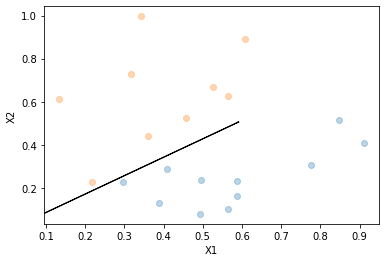

In [42]:
X, y = geradataset()
perceptron = Perceptron()
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y==ypred)/len(y))

plotadataset(X,y)
plotavetor(perpendicular(perceptron.w))

plt.show()

perceptron = Perceptron(custo=HingeLoss())
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y==ypred)/len(y))

plotadataset(X,y)
plotavetor(perpendicular(perceptron.w))



In [ ]:
X, y = geradataset()
perceptron = Perceptron(custo=HingeLoss)
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y==ypred)/len(y))

plotadataset(X,y)
plotavetor(perpendicular(perceptron.w))

plt.show()

Xte, yte = geradataset(1000)
ypred = perceptron.predict(Xte)
print(sum(yte==ypred)/len(yte))

plotadataset(Xte,yte)
print(perceptron.w)
plotavetor(perpendicular(perceptron.w))

In [12]:
Xte, yte = geradataset(1000)
ypred = perceptron.predict(Xte)
sum(yte==ypred)/len(yte)

0.981

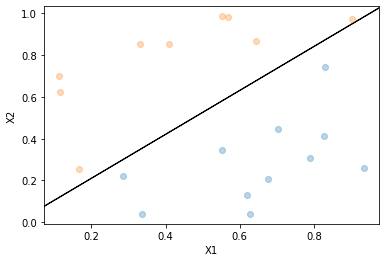

In [6]:
X, y = geradataset()
perceptron.fit(X,y)
ypred = perceptron.predict(Xte)
sum(yte==ypred)/len(yte)

plotadataset(X,y)
plotavetor(perpendicular(perceptron.w))

## Resposta


Pude observar que a HingeLoss convergiu mais rapido do que a Adaline, devido a decida do gradiente que é mais suave na Adaline
